<img src="http://www.ulb.ac.be/dre/com/docs/logo3lp.jpg" alt="ULB logo" width="20%" align="right"><br><br><br><br>



# Lecture 3
# Cosmic Rays in the Atmosphere

<a href="http://iihe.ac.be/~aguilar">Juan A. Aguilar</a>



## Interactions of CR particles in the atmosphere
### Introduction

In this lesson we will the different components of a cosmic air shower when cosmic rays interact with Earth's atmosphere. As seen in the figure below, we have 3 main components, the **electromagnetic component**, the **hadronic component** and muons and neutrinos which can be seen as the **muonic component**. 

<div>
<img src="images/air-shower.svg"  style="float:middle"\>
</div>

### The Atmosphere

Before studing the interactions of cosmic rays in the atmosphere we need to described out atmosphere.



It is important to know the atmosphere to understand the cosmic rays interaction in it. It is useful to define a paramter call the vertical atmospheric depth (also called column density), $X$ measured in g/cm$^{2}$ is defined as the integral in altitude of the atmospheric density $\rho$ above the observation level $h$:    

$$X =\int_h^{\infty} \rho(h^\prime){\rm d}h^\prime$$


<div>
<img src="images/atmos.png" width="50%" style="float:middle"\>
</div>

To calculate $X$ we need to know how the density changes as a function of the altitude $h$.

#### Atmosphere: The isothermal model

In an isothermal hydrostatic atmosphere a particular layer of gas at some altitude is static. That means that the downward (towards the planet) force of its weight, plus the downward force exerted by pressure in the layer above it, and the upward force exerted by pressure in the layer below, all sum to zero. Assuming a segment of area $A$ and heigth ${\rm d}h$ we can write this equilibrium of forces as:

$$P\cdot A - (P + {\rm d}P)\cdot A - (\rho A {\rm d}h)g_0  =0$$

$${\rm d}P = -g_0\rho(h) {\rm d}h$$

Using the ideal gas law:

$$ P = \frac{\rho R T}{M}$$

where $R$ is the ideal gas constant, $T$ is temperature, $M$ is average molecular weight, and $g_0$ is the gravitational acceleration at the planet's surface. We get

$$\frac{{\rm d}P}{P} = -\frac{g_0 M}{R T} {\rm d} h$$

assuming a constant and isothermal gas (const $T$) we can integrate a pressure decreases exponentially with increasing height as:

$$P = P_0 e^{-\frac{g_0 M}{R T} h} $$

where the we can define the **scale height** as:

$$ h_0 = \frac{R T}{M g_0} $$

Since the temperature is assumed to be constant it follows that $\rho$ also changes exponentially as $\rho = \rho_0 e^{-h/h_0}$ and therefore the column density  can be written as:

$$X = X_0 {\rm e}^{-h/h_0}$$ 

where $X_0$ is 1030 g/cm$^{2}$ is the atmospheric depth at sea level, h = 0. In particular for the isothermal model we have that the relation between atmospheric depth (aka column density) and density is:

$$ \rho(X) = \frac{X}{h_0} $$


#### The scale height


Using typical values ($T = 273$ K and $M = 29$ g/mol) we get that $h_0 \sim 8$ km  which coincidentally is the approximate height of Mt. Everest.  

In reality the temperature changes and hence the scale height decreases with increasing altitude until the tropopause.

This equations are valid for vertical particles, for zenith angles < 60$^\circ$ (for which we can ignore the Earth's curvature) the formula is scaled with $1/\cos{\theta}$ giving the *slant depth*

$$X_{slant-depth} = \frac{X}{\cos \theta} $$

### Processes of energy losses in the Atmosphere

Charge particles when entering in the atmosphere will suffer different process of energy losses. We are going to review some of them:

#### Ionization losses

The **ionization energy loss** of high energy charged particles with colission with atomic electrons is given by the Bethe-Block formula:

$$\left(\frac{{\rm d} E}{{\rm d} x}\right)_{ion}= -\left(\frac{4\pi N_0z^2e^4}{mv^2}\right)\left(\frac{Z}{A}\right)\left\{\log\left[\frac{2mv^2\gamma^2}{I}\right]-\beta^2\right\}$$

where $m$ is the mass of the electron, $v$ and $ze$ are the velocity and charge of the incoming particle, $N_0$ is the Avogadro's number, $Z$ and $A$ are the atomic and mass numbers of the atmos in the medium and $x$ the path travelled, and $I$ is the ionization potential of the medium is approximatively 10 Z eV.

* Since $Z/A \sim \frac{1}{2}$ in most materials it depends little on the medium.
* It varies as $1/v^2$ at low speed and independent of the incident particle mass.
* It reaches a minimum at about $3Mc^2$ and it increases logarithmically until it reaches a plateu value.



### Tutorial I: Plot of the ionization energy losses 

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Latex


In [5]:
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn-notebook")

In [6]:
from scipy import constants as cte
m_e = cte.value("electron mass energy equivalent in MeV") * 1e6 # in eV
m_m = cte.value("muon mass energy equivalent in MeV") * 1e6 # in eV
alpha = cte.fine_structure
r0 = cte.value("classical electron radius") 
N0 = cte.N_A
Z = 11. # For standard rock
A = 2*Z 
I = 10.*Z #eV

def Ionization(beta, m):
    K = 0.307 
    z = 1 # assuming electron or muon
    gamma = 1/np.sqrt(1 - beta**2)
    return K * z **2 * 0.5 * -1/beta**2 * (np.log((2*m*beta**2*gamma**2)/I) - beta**2)



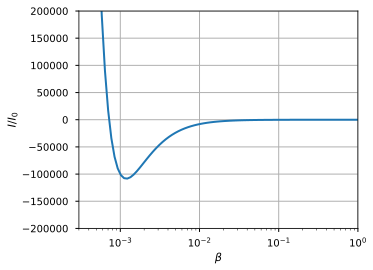

In [7]:
fig = plt.figure(figsize=(5,4))
ax = plt.subplot(111)
ax.set_ylim(-2e5, 2e5)
ax.grid()
ax.set_xscale("log")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel("$I/I_0$")
ax.set_xlim(3e-4, 1e0)
ax.set_ylim(-2e5, 2e5)

x = np.logspace(-4, -0.01, 100) #To avoid beta = 1 and an divided by 0 error we put the maximum to 10**(-1e-9)
ax.plot(x, Ionization(x, m_m), lw=2, label="Electron")
plt.show()

####  Radiation losses
In addition to ionization losses, high energy electrons also undergo **bremsstrahlung** or braking radiation given by:

$$\left(\frac{{\rm d} E}{{\rm d} x}\right)_{rad} = -\frac{E}{X_0}$$ 
where the **radiation length** is:

$$\frac{1}{X_0} = 4 \alpha\left(\frac{Z}{A}\right)(Z + 1)^2r_e^2N_0\log\left(\frac{183}{Z^{1/3}}\right)$$

where $r_e = e^2/4\pi m_e c^2$ is the classical electron radius and $\alpha = \frac{1}{137}$ is the fine structure constant. 

* Bremsstrahlung is proportional to $\frac{1}{X_0} \propto r^2_{e} \propto 1/m_e^2$. The radiation length of a muon will be $(m_\mu/m_e)^2$ times that for an electron.
* Bremsstrahlung is proportional to the energy.

The critical energy is the energy at $({\rm d}E/{\rm d}x)_{ion} = ({\rm d}E/{\rm d}x)_{rad}$. Above this energy the radiation process dominates, below the ionization. Roughly $E_c \sim 600/Z$ MeV.


####  Cherenkov Radiation

When relativistic particles traverse a medium at a speed greater than the speed of light in that medium it can induce Cherenkov radiation. 

<div>
<img src="http://upload.wikimedia.org/wikipedia/commons/8/87/Cherenkov_radiation-animation.gif" style="float:middle"\>
<p>Source: Wikipedia </p>
</div>

Cherenkov light is emitted in the UV and blue region in a narrow cone with angle:

$$\cos \theta = \frac{ct/n}{\beta c t} = \frac{1}{\beta n}$$

so the threshold for production is $\beta > \frac{1}{n}$. Most of the components in the air shower will produced abundant Cherenkov light.

We will see more on Cherenkov radiation on the next lesson about $\gamma$-ray astronomy.


#### Pair production

If a photon from bremsstrahlung has enougth energy $E_\gamma > 2 m_e$ it can produced a pair of electron positron. The cross-section rises quickly at the threshod of $2 m_e$ but in the high energy part it can be approximated to:

$$\sigma = \frac{7}{9} r_0^2 Z (Z+ 1)\log \left(\frac{183}{3\sqrt{Z}}\right)$$

The pair production cannot occure in vacum, a photon desintegrated to the pair $e^-e^+$ will have a null momentum in the CoM system, therefore a nucleus has to be present to absorb the momemtum. 
As can be seen the radiation length $X_0$ is very similar to the one from radiation losses. In fact we can write:

$$\frac{1}{X_{pair}} = \frac{7}{9}\frac{1}{X_0}$$

Which means that the ** radiation lengths for braking radiation and pair production are comparable**.


### Electromagnetic shower

When photons from radiation losses of electrons, have enough energy to produce pairs of positrons electrons, these hey also can produce photons which, in turn, can also produces pairs, etc, etc. This is called an **electromagnetic shower**.

#### The Heitler toy model 

The Heitler toy model explains very well the development of an electromagnetic shower.
As we saw, in the ultrarelativistic limit the radiation lenghs for pair production and bremsstrahung are comparable. We can defined a distance $d_{split} = X_0 \log2$ where an electron will looses, on average, half of its energy. 

An electron with inital energy $E_0$ in a medium will generate a photon in a $d_{split}$ length of energy $E_0/2$, in the next radiation length the photon can convert into $e^+e^-$ each with energies $E_0/4$. After $t$ steps the electrons, positrons will have energies of $E(t)=E_0/2^t$. This continues until the electrons, positrons fall below the critical energy of electrons, $\epsilon_e$, and ionization dominates. The process is illustrated in the figure below, where each step $n$ corresponds to one radiation length.

<div>
<img src="images/em-shower.svg" width="50%" style="float:middle"\>
</div>

The Heitler model has the following properties:

* The shower has maximum at:

$$t_{max} = \frac{\log(E_0/\epsilon_e)}{\log2}$$

* The maximum number of particles is:

$$N_{max} = 2^{t_{max}} = \frac{E_0}{\epsilon_e}$$


* The shower maximum will be at a depth $X_{max}$:

$$X_{max}=d_{split} \frac{\log(E_0/\epsilon_e)}{\log2} = X_0 \log(E_0/\epsilon_e)$$

For air $\epsilon_e = 85$ MeV and the **radiation length** $X_0 = 36.7 {\rm g/cm}^2$.<br>

Actual showers also spread laterally mostly due to Coulomb scattering. The lateral spread is a few times the so-called **Moliere unit** equal to $21/\epsilon_e$ (MeV).

The $X_{max}$ prediction of the Heitler model is in good agreement with Monte Carlo simulations. However, the electron to photon ratio of 2 is not in agreement given that the model predicts only one photon emitted by bremsstrahlung. Simulations show a ratio of 1/6 since in reality several photons are emitted and electrons lose energy much faster than photons do. 

### Hadronic showers

Before modeling the baryon-induced showers or hadronic showers, we need to estimate the *nuclean mean free path* in the atmosphere. The nucleon mean free path, $\lambda^{air}_N$, in the atmosphere is given (in g/cm$^2$) by:

$$\lambda^{air}_N = \frac{Am_p}{\sigma_N^{air}}$$

where $\sigma_N^{air}$ is the nucleon cross-section in air, $A$ is mean the mass number of air nuclei (mainly nitrogen, oxygen) and $m_p$ is the proton mass. Assuming $A \sim 14.5$ and $\sigma_N^{air} \approx$ 300 mb, it corresponds to $\lambda_N^{air} \approx 80$g/cm$^{2}$.


The *standard* mean free path is: $l = (n\sigma^{air}_N)^{-1}$ where $n$ is the **number** density of air nuclei ie:

$$n = \frac{N_T}{V}$$

Where $N_T$ is the total number of air nuclei and V is total air volume. $\sigma^{air}_N$ is the nucleon-air cross section. 

The *density mean free path* is $\lambda = \rho l$, but $\rho = M_T/V$ and $M_T = N_T \cdot m_{air}$ where $m_{air}$ is mass of an air nuclei. Putting everything together:

$$\lambda^{air}_N = \rho l = \frac{N_T m_{air}}{V}\frac{V}{N_T\sigma_{air}} = \frac{m_{air}}{\sigma_{air}}$$

where we can use $m_{air} = A m_p$. Note that this definition is independent of the mass density, so if the density changes with altitude like in our atmosphere, the density mean free path is the same.

#### The Heitler-Matthew model for hadronic air showers

In the Heitler model can be adapted also for hadronic showers. This is what Matthew did. We can imagine a proton initiating the cascade instead of a photon/electron, in this case a hadronic air shower will develope:

<div>
<img src="images/proton_eas.png" width="20%" style="float:middle"\>
</div>

We can assume that the first interaction is defined by the proton mean free path $\lambda^{air}_N$. Denining the first interaction point where the proton will lose (on average) half of its energy this first interaction length is given as $\lambda^{air}_{N} \log 2$ where for protons $\lambda^{air}_N \approx 80$g/cm. After the first interaction we can use the simplified assumption that the hadronic interaction produces only $3N_\pi$ pions. 2$N_\pi$ will be charge pions and $N_\pi$ will be $\pi^0$. 

<div>
<img src="images/hadronic-shower.svg" width="50%" style="float:middle"\>
</div>

We also assume the energy is equally distributed among them, so $2/3E_0$ will go to charge pions and $1/3E_0$ will go to the neutral pions. The $\pi^0$ has a very short decay time, so it will decay and produce an electromagnetic shower. Charge pions will continue generating hadronic shower in each $d_{split} = \lambda_{\pi}^{air} \log 2$ with the mean free path of pions $\lambda_\pi^{air} \sim 120$g/cm$^2$ until they reach the critical energy where pions decay is more probable than interactions $\epsilon_\pi$. On each step we assume that energy is equally divided among the $3 N_\pi$ pions. Thefore at each step $t$ the energy of the pions is:

$$E_\pi = \frac{E_0}{(3N_\pi)^t} $$

The number of radiation lengths $t$ to reach the critical energy ie $E_\pi = \epsilon_\pi$, and is given (as in the case of EM showers):

$$t_{max} = \frac{\log(E_0/\epsilon_\pi)}{\log(3N_\pi)}$$ 

Assuming that after that energy all pions decay to muons, the number of muons is given by:

$$N_\mu =(2N_\pi)^{t_{max}}$$

introducing $\beta = \log(2N_\pi)/\log(3N_\pi)$ we have:

$$N_\mu =(E_0/\epsilon_\pi)^\beta $$

This is also called the *multiplicity* and corresponds to the muon bundles as we will see later.
For pions between  1 GeV and 10 TeV an appropiate number is $N_\pi = 5$ and in that case $\beta = 0.85$. Therefore the number of muons doesn't grow linearly with the intial energy but a slower rate.

The definition of $X_{max}$ is somehow less clear than in an EM shower. Hadronic showers are still dominated by electromagnetic processes, so we can assume that $X_{max}$ depdens dominantly on the first generation of $\pi^0$ subshowers. For proton primaries, the first interaction will be given by the nucleon mean free path where in this first interaction the proton splits in $3N_\pi$ particles. The depth of maximum is then obtained as:

$$X_{max} = \lambda^{air}_N \log2 + X_0 \log 2 \frac{\log(E_0/\epsilon_e)}{\log(3N_\pi)} $$

where again $\epsilon_e$ is the critical energy of electrons. The expected values of this formula are low when compared to detailed simulations because it neglects the contributions of the next one or two generation of $\pi^0$ production.

#### Superposition model for heavy nuclei air showers

We can extend the discussion to heavy nuclei by adopting the *Superposition model* in which a nucleus of mass A and energy $E_0$ essentially generates $A$ subshowers of energy $E_0/A$. In that case the muon multiplicity will be:

$$N_\mu = A \left(\frac{E_0}{A\epsilon_\pi}\right)^\beta \propto E_0^\beta A^{1 - \beta} $$

therefore the muon multiplicity will depend on the CR composition. Likewise the shower maximum is given by:

$$X^{A}_{max} = X_{max}^{p}(E_0) - X_0\log{A}$$

ie, for a given energy $E_0$ the shower max depends on the mass of the CR primary and it is typicall smaller than for protons (ie reach the maximum sooner in the atmosphere). For composition studies therefore it is necessary to measure $X_{max}$ and the energy of the shower, which can be estimated from fluorescence techniques.

## The muonic component

### Muons and neutrinos

<div>
<img src="images/cr_fig3_07.png" width="40%" style="float:middle"\>
<p>Source: Particle Data Group </p>
</div>

* Primaries dominate up to 9 km, secondaries (electrons, pions) roughly follow the primary shape. Muons and neutrinos are continously produced.

* Vertical fluxes for $E > 1$ GeV. Points show the $\mu^-$ measurements.
Muons and neutrinos are produced in
decays of mesons which are themselves
produced by interactions of CR
particles with air nuclei.
* They are the dominant flux at sea level and the only ones that can penetrate deep underground.

Electrons and nucleons fluxes above 1 GeV/$c$ are about 0.2 and 2 m$^{-2}$ s$^{-1}$ sr$^{-1}$ at sea level. Nucleons are the degraded remnants of the primary cosmic radiation. At sea level about 1/3 are neutrons.

### Muons and neutrinos productions

The most important channels for muon and neutrino production are:

* Two body decays
$$\pi^{\pm} \rightarrow \mu^{\pm} + \nu_{\mu}({ \bar \nu_\mu}) \rm{\;\; (\sim 100\%)}$$
$$K^{\pm} \rightarrow \mu^{\pm} + \nu_{\mu}({\bar \nu_\mu}) \rm{\;\; (\sim 63.5\%)}$$

* Three body decay
    $$K_L \rightarrow \pi^{\pm} e^{\pm}\nu_e({\bar \nu_e}) \rm{\;\; (\sim 38.7\%)}$$

At lower energies, the muon decay is also important: 

$$ \mu^{\pm} \rightarrow e^{\pm} + \nu_{e}({\bar \nu_e}) + {\bar \nu_{\mu}}(\nu_\mu)$$

For each of the 2-body decay channels, assuming the muon always decay the neutrino flavor ratio is: 

$$\boldsymbol{ \nu_\mu : \nu_e = 2:1}$$

### Mean free path for mesons, $\pi$, K

Charged pions and Kaons can interact or decay. Both processes have a mean free path and one or the other will dominate depending on which mean free path is larger.

* The **decay mean free path** of pions is given by $\lambda^d_\pi =\gamma  c \tau_\pi$ where $\gamma$ is the lorentz boost. Multiplying for density we have $d_\pi = \rho(X) \gamma  c \tau_\pi$. However the atmosphere density depends on the atmospheric depth as $\rho(X) = X/h_0$. In units of *slant depth*, $X_{sd} = X/\cos\theta$ and expanding $\gamma = E / m_\pi c^2$ is defined as:

$$\frac{1}{d_\pi} = \frac{m_\pi c^2 h_0}{E c \tau_\pi X_{sd} \cos \theta} = \frac{\epsilon_\pi}{E X_{sd} \cos\theta}$$

where $E$, $m_\pi$, $\tau_\pi$ are the pion energy, mass and lifetime and we defined:

$$\epsilon_\pi = \frac{c\tau_\pi}{m_\pi c^2 h_0}$$

as a *critial energy* when the decay length equals the *slant depth* ie $d_\pi(\epsilon_\pi) = X_{sd} \cos\theta$.

* The **interaction mean free path** is the same as nucleon $\lambda_\pi = A m_\pi/\sigma_\pi^{air}$ which as we saw is indenpendent of $X$.




### Critical energy  for mesons, $\pi$, K

Decay or interaction dominates depending on whether $1/d_\pi$ or $1/\lambda_\pi$ is larger. This in turns depends on the ratio between E and $\epsilon_\pi$. For pions we have:

$$\epsilon_\pi = \frac{c\tau_\pi}{m_\pi c^2 h_0} \approx 115 \;{\rm GeV}$$

So we can distinguish two regimes.

   * For $E \gg \epsilon_\pi$ decay length is much larger than the slant depth, so interaction dominates.
    
   * For $E \ll \epsilon_\pi$ decay dominates.

The same formulas can be derived for Kaons.

### Muon Fluxes

Characteristics of the muon fluxes

* Muons are the most numerous charged particles at sea level
* The mean energy of muons at the ground is $\sim$ 4 GeV.
* The integral intensity of vertical muons above
1 GeV/c at sea level is ≈ 70 m$^{−2}$s$^{−1}$sr$^{−1}$ or $\approx$ 1 cm$^{-2}$min$^{-1}$.





#### Energy regimes of muon fluxes

Three different regimes are distinguishable:

1. $E_\mu \leq \epsilon_\mu$, where $\epsilon_\mu \sim 1 {\rm\;GeV}$. In this case muon decay and muon energy loss are important. The muon flux is suppressed.

2. $\epsilon_\mu \leq E_\mu \leq \epsilon_{\pi,K}$, where $\epsilon_\pi = 115 {\;\rm GeV}$ and $\epsilon_K = 850 {\;\rm GeV}$. In this range all messons decay and muons follow the same spectrum as mesons and hence of CRs. The muon is almost independent of the zenith angle.

3. $E_\mu \gg \epsilon_{\pi,K}$, Mesons do not decay and muon flux gets suppressed. 



#### Analytical approximation

* An approximate extrapolation
formula valid when muon decay is negligible ($E_\mu > 100/\cos\theta$ GeV) and the curvature of the Earth can be neglected ($\theta < 70^{\circ}$) is given by the Gaisser parametrization:

$$
\frac{dN_\mu}{dE_\mu d\Omega} = \frac{0.14}{\rm{ cm^2\;s\;sr\;GeV}} 
\left(\frac{E_\mu}{\rm{ GeV}}\right)^{-2.7}\left[F_\pi(E_\mu, \theta) + 
F_K(E_\mu, \theta)\right]$$

where $F_\pi$ and $F_K$ represent the contributions from pions and kaons, respectively:

$$
F_\pi(E_\mu, \theta) = \frac{1}{1+\frac{1.1 E_\mu \cos\theta}{115 \;\rm {GeV}}} 
$$

$$F_K(E_\mu, \theta) = \frac{0.054}{1+\frac{1.1 E_\mu \cos\theta}{850{\;\rm GeV}}} $$


### Tutorial II: Plot the muon flux for two different angles

In [4]:
def muons(cangle, E):
    a = 1./(1.+ 1.1*E*cangle/115.)
    b = 0.054/(1.+ 1.1*E*cangle/850.)
    return 0.14 *E**-2.7 *(a + b)

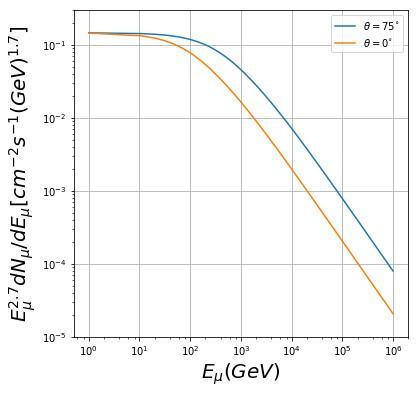

In [6]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-5, 3e-1)
ax.set_ylabel("$E_\mu^{2.7} dN_\mu/dE_\mu [cm^{-2}s^{-1} (GeV)^{1.7}]$", fontsize=20)
ax.set_xlabel("$E_\mu(GeV)$", fontsize=20)
ax.grid()
E = np.arange(1e0, 1e6, 10)
ax.plot(E, E**2.7*muons(np.cos(75*np.pi/180.),E), label=r"$\theta = 75^{\circ}$")
ax.plot(E, E**2.7*muons(np.cos(0*np.pi/180.),E), label=r"$\theta = 0^{\circ}$")
plt.legend()
plt.show()

#### Experimental values
In reallity below 10 GeV muon decay and energy loss become imporant and Gaisser parametrization overestimate the muon flux:

<div><img src="images/atmmu.png" width="50%" style="float:middle"/>
<p>Source: Particle Data Group</p>
</div>

### Muon Bundles

Sometimes muons also come in groups or **bundles** of parallel muons originated from the same primary CR. Muon bundles sometime look like a single high energy muon. The multiplicity (number of muons in the bundle) if can be measured is correlated with the mass of the orignal CR. The image belowe shows a muon-bundle event observed with the MACRO underground detector.

<div>
<img src="images/macro-bundle.png" width="100%" style="float:middle"\>
<p>Source: MACRO collaboration</p>
</div>

<center><small> Muon bundel event measured in the MACRO undeground detector </small></center>

### Charge Ratio

The muon charge ratio reflects the excess of $\pi^+$ over $\pi^-$ and $K^+$ over $K^−$ and the fact that
there are more protons than neutrons in the primary spectrum. 

<div>
<img src="images/muon_ratio.png" width="40%" style="float:middle"\>
<p>Source: Allkofer et. al. Phys. Lett. B36, 425 (1971). Jokisch et. al. Phys. Rev. D19, 1368 (1979)</p>
</div>

The increase with energy of the ration is due to an increasing importance of kaons coming from the process $ p + N \rightarrow \Lambda + K^+$.


$$ p + N \rightarrow p^\prime + N^\prime  + k \pi^+ + k \pi^- + r\pi^0 $$
$$ p + N \rightarrow n + N^\prime  + (k + 1) \pi^+ + k \pi^- + r\pi^0 $$

where $k$ and $r$ are the multiplicity of the particle species. Assuming same cross sections we obtain:

$$ R = \frac{N(\pi^+)}{N(\pi^-)} = \frac{2k+1}{2k} = 1 + \frac{1}{2k} $$

for low energies $k = 2$ and $R = 1.25$

### Neutrinos Fluxes

<div>
<img src="images/nuflux.png" width="50%" style="float:middle"\>
<p> Credit:Fluxes from Agrawal et. al. Phys. Rev. D53 1314 (1996)</p>
</div>

* Neutrinos are the most abundant CR product at sea level, yet they have only recently (compared to other particles) measured due to their extremely low cross-section.

* The process giving neutrino fluxes are the same as for the muons (we saw already) plus the muon decay. Taking into account the decay of pions, kaons and muons gives to a flavor ratio of: $\nu_\mu : \nu_e = 2:1$ and $\nu_e/{\bar \nu_e} \sim \mu^+/\mu^-$

* At few GeV (> $\epsilon_\mu$) muons will not decay and $\nu_e$ will be supressed as the main source of $\nu_e$ is the muon decay.

<div class="question">
<b>Note:</b> in astrophysical sources the ration 2:1 persists. <a href="http://en.wikipedia.org/wiki/Pion#Charged_pion_decays">Why pions don't decay in to electrons?</a>
</div>

### Fluxes and kinematics

As mentioned neutrinos and muons are strongly correlated. However due the two-body kinematics, the energy spectra of the $\nu$’s and $\mu$’s from mesons decay are different. For example, the energy of the muon in CoM is given by: 

$$E_\mu^{*} = (m_\pi^2 + m_\mu^2)/2m_\pi = 109.8 {\rm\; MeV}$$

and for the neutrino:

$$E_\nu^{*} = (m_\pi^2 - m_\mu^2)/2m_\pi = 29.8 {\rm \; MeV}$$

In the laboratory system, the energies are boosted by
the Lorentz factor $\gamma= E_\pi /m_\pi$, but as can be seen muon carry a much larger fraction of energy than neutrinos. 
For energies about 1 TeV $ < E_\nu <  10^3$ TeV, the angle averaged atmospheric $\nu_\mu + {\bar \nu_\mu}$ can be approximated by a power law spectrum:

$$\frac{\rm{ d}N_{\nu_\mu + {\bar \nu_\mu}}}{\rm{ d}E_\nu} = 7.8 \times 10^{-11}\left(\frac{E_\nu}{1\rm{\;TeV}}\right)^{-3.6} \rm{ \; cm^2\;s^{-1}\;sr^{-1}\;GeV^{-1}}$$





### Fluxes as function of zenith

The following plot shows the calculated neutrino flux at 1,300 m depth with energies $E_\nu = 10$ GeV.

<div>
<img src=images/nu_zenith.png width="40%" style="float:middle">
<p>Source: [arXiv:1210.5154](http://arxiv.org/abs/1210.5154) </p>
</div>


The peak at the horizon in the atmospheric neutrino flux is due to the so-called *secant theta effect*. This effect occurs because pions and kaons that are produced nearly skimming the Earth have more flight time in less dense atmosphere, so they have more chance to decay than interact.


### Prompt Fluxes
Apart from kaons and pions, charmed messons will also be produced in the atmosphere. Charm particles have lifetimes so short they almost alway decay before interacting. Muons and neutrinos from charm decay are called *prompt* muons/neutrinos. There are two peculiarities of the prompt fluxes:

* The energy spectrum follows the one of the primary cosmic rays.
* Since there is no competition between decay and interaction of the charm particle, the *prompt* flux is **isotropic**.
* They produced the same amount of $\nu_\mu$ and $\nu_e$.

Prompt fluxes have not been observed yet.


### Summary of neutrino atmospheric fluxes

<center><img src="images/aguilar_geneva2015.001.jpg" width="100%"></center>

## Particles underground

### Muon Interactions

* <b>Ionisation.</b>The continuous energy loss of muons passing through a medium as it ionize the material along the path. 

<img src="images/muon_ionization.svg" width="40%" style="float:middle">

* <b>Bremsstrahlung.</b> Also called braking radiation. In the electric field of a nucleus or atomic electrons, muons can radiate high energy photons.


<img src="images/muon_braking.svg" width="40%" style="float:middle">


* <b>Pair production.</b> A muon can radiate a virtual photon which, again in the electric field of a nucleus, can convert into a real $e^+e^-$ pair


<img src="images/muon_pair-production.svg" width="40%" style="float:middle">



* <b>Photonuclear interactions.</b> A muon can radiate a virtual photon which directly interacts with a nucleus in the muon propagation medium. The interaction is either electromagnetic or following the fluctuation of the photon into a quark-antiquark pair (i.e. a virtual vector meson). 



<img src="images/muon_photonuclear.svg" width="40%" style="float:middle">




### Muon Energy losses

The energy losses due to ionization are continuous while in radiation processes the energy is lost in bursts along the muon path. The energy loss for muons at high energy can be simplified to:

$$\frac{{\rm d}E_\mu}{{\rm d}X} = -\alpha -\beta E_\mu$$

where $X$ is the thickness of the material (in g/cm$^2$), $\alpha$ is the energy loss due to ionization and $\beta = \beta_{br} + \beta_{pair} + \beta_{ph}$ are the three discrete energy loss processes: bremsstrahlung, electron-positron production and electromagnetic interaction with the nuclei. Thickness is also given sometimes in units of meters water equivalent (1 m.w.e. = 10$^2$ g/cm$^2$).


The **critical energy** is when both losses are equal, ie $\epsilon_\mu = \alpha/\beta$. Typical values are $\alpha \simeq 2$ MeV g$^{-1}$cm$^2$ and $\beta \simeq 4 \times 10^{-6}$g$^{-1}$cm$^2$, so $\epsilon_\mu \approx 500$ GeV.



### Stocastic energy losses in muons.


The following plots showd simulated muons bundles in IceCube. The stocastic energy losses are particular evident in the right figure.  

<div>
<div style="float:left;width:48%">
<img src="images/musmooth.jpg" width="100%" /></div>
<div style="float:right;width:48%">
<img src="images/mustochastic.jpg" width="100%" />
</div>
<p> Credit: IceCube collaboration </p>
</div>



### Muon Range



By solving the energy loss equation we can estimate the range $R$ for a muon $E_\mu$, ie the underground depth this muon will reach until its energy is 0  (see Exercises 2):

$$ R(E_\mu) = \frac{1}{\beta}\log\left( 1 + \frac{E_\mu}{\epsilon_\mu}\right)$$

Assuming the muon spectrum at sea level can be approximated to a power law $I_\mu(>E_\mu) = AE_\mu^{-\gamma}$ and using the relationship between range and energy we can write the *depth-intensity relation* (DIR):

$$I_\mu(>E_\mu, R) = A\left[\frac{\alpha}{\beta}(e^{\beta R} - 1)\right]^{-\gamma}$$

The plot below shows the depth-intensity muons for vertical directions. The grey-area are neutrino-induced muons (horizontal, up-wards)


<div>
<img src="images/muon-depth.png" width="50%" style:"float:middle">
</div>


### Neutrino Interactions
#### Weak interaction

Neutrinos feel only the weak force thus interactions with matter mediated by W and Z bosons with cross-sections typical of weak processes. Feynman diagrams factor along two lines:

* Neutral current (NC) interactions - exchange of Z
* Charged current (CC) interaction - exchange of W$^{\pm}$

<div>
<img src="images/neutrino-interactions.svg" style="float:middle">
</div>

Neutrinos will scatter from electrons as well as nuclear matter. Below 1 GeV neutrinos interact with hadronds via **elastic** or **quasielastic scattering**.

* At $E_\nu \gg$ 1 GeV neutrinos do not scatter on hadronds as a compound of quarks, they start to *see* the quarks, **Deep Inelastic Scattering**.
    

### Neutrino cross-sections at GeV energies

The anti-neutrino cross-section at GeV energies is a factor ~2 lower (naively should be 3, but the factor 2 comes from the structure function of the nucleus) than the neutrino cross-section due to the helicity. 

<div>
<img src="images/pdg_plot.gif", width="50%" style="float:middle">
<p style="font-size:8pt">Credit: Particle Data Group</p>
</div>

At $E_\nu \gg 1$ GeV the DIS cross-section can be approximated to:

$$\sigma_{\nu p} \simeq 0.69 \times 10^{-38} \left(\frac{E_\nu}{ 1 \rm{\; GeV}}\right) \rm{ \; cm}^2$$
$$\sigma_{\bar{\nu} p} \simeq 0.35 \times 10^{-38}\left(\frac{E_\nu}{ 1 \rm{\; GeV}}\right) \rm{ \; cm}^2$$

### Tutorial I: Earth is transparent to GeV neutrinos


In [7]:
from astropy import constants as ct
from astropy import units as u
#Earth mass
print ct.M_earth

#Neutron/proton mass
print ct.m_p 

#Earth radius
print ct.R_earth

#number of nucleons
N = ct.M_earth/ct.m_n 

#Earth volume
Ve = 4/3*np.pi*ct.R_earth**3

#Nucleon density
Nd = N/Ve


#Cross section
s = 1e-38 * u.cm**2
#Mean free path:
L = 1/(s * Nd.to(1/u.cm**3))

print "The mean free path is: ", L.to(u.km) 

  Name   = Earth mass
  Value  = 5.9742e+24
  Uncertainty  = 5e+19
  Unit  = kg
  Reference = Allen's Astrophysical Quantities 4th Ed.
  Name   = Proton mass
  Value  = 1.672621777e-27
  Uncertainty  = 7.4e-35
  Unit  = kg
  Reference = CODATA 2010
  Name   = Earth equatorial radius
  Value  = 6378136.0
  Uncertainty  = 0.5
  Unit  = m
  Reference = Allen's Astrophysical Quantities 4th Ed.
The mean free path is:  228532208.123 km


### Neutrino cross-sections at TeV energies

* At low energies the valence quark parton distribution dominates and both the neutrino NC and CC cross-section grows linear with energy since the transfer momemtum $q^2 \ll M_{W,Z}$ and so the propagator term is $\sim 1/M^2_{W,Z}$

* Above 10$^{4}$ GeV where the gauge-boson propagator restricts the momentum transfer to values near $M_{W,Z}$ ($\sim 1/(q^2 - M^2_{W,Z})$) and damps the cross-section increase.

<div>
<img src="images/break_cc_new.png" width="50%" style="float:middle">
<p>Source: [astro-ph/0310636](http://arxiv.org/abs/0310636) </p>
</div>

### High energy Cross-Sections

The following shows the neutrino cross section:

<div>
<img src="images/uhenucx.png" width="50%" style="float:middle">
<p>Calculated neutrino cross sections taken from [arXiv:1309.1764](http://arxiv.org/abs/1309.1764)</p>
</div>

* At high energies the asymetry between neutrinos and antineutrinos is lost due to the interaction with *sea quarks* ($q\bar{q}$)

* Neutrinos interact mostly with hadrons (quarks) instead of electrons due the their larger target mass. However at $E_\nu \approx 6.3$ PeV the Glashow resonance appears: ${\hbar \nu_e} + e \rightarrow W$ making the cross-section higher than the one with hadrons.

### Earth Opaque to PeV Neutrinos

* At about 100 TeV the mean free path for neutrino-nucleus scattering is about 10$^{10}$ c.m.w.e. which is about the matter thickness along the Earth diameter.

* This means that UHE neutrino observatories (like IceCube) the flux of neutrinos comming from the nadir is stronly suppressed.

* There is only one exception. A very high energy beam of $\nu_\tau$ at one side of the Earth $E\gg 1$ PeV can end up at the other side as lower energy $\nu_\tau, \nu_e,\nu_\mu$ thought the **tau regeneration** effect: $\nu_\tau \rightarrow \tau \rightarrow \nu_\tau$

### Neutrino signatures in a detector

<div>

<img src="images/nu_signatures.png" width="70%" style="float:middle">

</div>


* b) In CC $\nu_e$ interactions an hadronic and EM shower initiated by the $e$ is produced. About 20% of the energy goes inthe hadronic shower and 80% to the lepton and therfore to the EM shower.
* d) In CC $\nu_\tau$ d) interaction again an hadronic and EM shower are produced as the $\tau$ decays almost inmediately to pions or other charge leptons. In the decay another $\nu_\tau$ is produced **tau regeneration effect**. At very high energyes the two showers can be separated giving a *double bang* signature or a *lollipop* if the first shower happens outside the detector.
* c) In CC $\nu_\mu$ the muon only undergoes radiation losses (not ionization) and hence the track of the muon can be reconstructed.
* a) In NC only an hadronic shower is visible.

### Event rate in an underground experiment.

An estimate of the detection rate of neutrino events is equivalent to calculate the rate of a neutrino-induced muon/cascades flux:

$$R(E_{vis}, \theta) = \int_{E_{vis}} P_{\nu\rightarrow l} (E_\nu, E_{vis}) P_{shadow}(\theta, E_\nu) \frac{{\rm d}N_\nu}{{\rm d}E_\nu}{\rm d}E_\nu$$ 

where 
 * $P_{\nu\rightarrow l}(E_\nu, E_{vis})$. Probability that a neutrino interacts with an nucleus to produce a $\mu$ or an EM or hadronic cascade with a minimum energy $E_{vis}$ *visible* in the detector.
 * $P_{shadow} (\theta, E_\nu)$. Probability of neutrino with zenith angle $\theta$ and energy $E_\nu$ of being absorved by Earth.
 * ${{\rm d}N_\nu}/{{\rm d}E_\nu}$. Neutrino flux at the surface.




### Interaction probability: $P_{\nu\rightarrow l}$

The probability of a neutrino to produce a lepton or shower visible in the detector can be  writen as:

$$P_{\nu \rightarrow l} = N_A \int_{E_{min}}^{E_\nu} {\rm d}E_l \frac{{\rm d}\sigma}{{\rm d}E_l}r_l(E_l, E_{vis})$$

where $r_l$ is the detection range of the produced lepton/cascade with energy $E_l$ ending with the minimal energy $E_{vis}$, and ${{\rm d}\sigma}/{{\rm d}E_l}$ is the neutrino cross-section to produce a lepton/cascade with energy $E_l$. 

At high energy the event rate is dominated by neutrino-induced muons due to the long range of the high energy muons.


### Earth Shadow: $P_{shadow}$

The mean free path of neutrinos can be expressed as $\lambda = (N_A \sigma_{tot})^{-1}$. The shadow fact then can be expressed as:

$$P_{shadow} = e^{-N_A \sigma_{tot} X(\theta)}$$

Where $X(\theta)$ is the column depth travelled by the neutrino through the Earth with a zenith angle $\theta$. 

See **Exercises 2** for an evaluation of the event rate in an underground detector.



### Neutrino Oscillations

Neutrinos are generated in flavor eingenstate however propagation is done in mass eingenstate, since each planar wave has a different frecuency given their different masses, the neutrino detected (also in flavor eingenstate) will have a different interference pattern than the one generated given rise to neutrino flavor oscillations.

* As a result of these changes in relative phases, neutrinos oscillate from one flavor to another as they travel. Low-energy neutrinos oscillate in a shorter distance than high-energy neutrinos.

* A curious aspect of quantum physics is that only the **probability of the flavor of neutrino changes as it travels**.

* The neutrino *only becomes a definite flavor when it interacts* in a detector - by finding whether an electron, muon, tau is created.



### The PMNS Matrix

The Pontecorvo-Maki-Nakagawa-Sakata matrix is the one that relates the mass eingenstates with the flavor eingenstates:

$$\begin{pmatrix} \nu_e \\ \nu_\mu \\ \nu_\tau \end{pmatrix} = U_{PMNS} \begin{pmatrix} \nu_1 \\ \nu_2 \\ \nu_1 \end{pmatrix}$$

with:


$$
\begin{align*}
U_{PMNS} &= 
\begin{pmatrix} 
c_{12}c_{13} & s_{12}c_{13} & s_{13}e^{-i\delta} \\
-s_{12}c_{23} - c_{12}s_{23}s_{13}e^{i\delta} & c_{12}c_{23} - s_{12}s_{23}s_{13}e^{i\delta} & s_{23}c_{13} \\
s_{12}s_{23} - c_{12}c_{23}s_{13}e^{i\delta} & -c_{12}s_{23} - s_{12}c_{23}s_{13}e^{i\delta} & c_{23}c_{13} \end{pmatrix} \\
&= \begin{pmatrix} 
1 & 0 & 0 \\ 0 & c_{23} & s_{23} \\ 0 & -s_{23} & c_{23} 
\end{pmatrix}
\begin{pmatrix} 
c_{13} & 0 & s_{13}e^{-i\delta} \\ 0 & 1 & 0 \\ -s_{13}e^{i\delta} & 0 & c_{13} 
\end{pmatrix}
\begin{pmatrix} 
c_{12} & s_{12} & 0 \\ -s_{12} & c_{12} & 0 \\ 0 & 0 & 1 
\end{pmatrix}
\end{align*}
$$

where $s_{ij} = \sin \theta_{ij}$, $c_{ij} = \cos \theta_{ij}$. The term $\delta$ is a CP violation term, if $s_{13} = 0$ we won't be able to measure $\delta$ as it always multiplies $s_{13}$

### The 2-flavor mixing case

Let's assume 2 flavor eigenstates identified as rotations of 2 mass eigenstates:

$$\begin{pmatrix} \nu_e \\ \nu_\mu \end{pmatrix} = \begin{pmatrix} \cos\theta & \sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} \nu_1 \\ \nu_2 \end{pmatrix}.$$

The angle $\theta$ is called the mixing angle.

The mass eigenstates evolve as plane waves with fixed momemtum $p$:

$$|\nu_{i}(t, x)\rangle = e^{ -i (E_{i} t - p_i x) }|\nu_{i}(0,0)\rangle$$

Let's imagine we start at $(x,t) = (0,0)$ with a pure beam of $\nu_e$:

$$\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \cos\theta & \sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} \nu_1(0,0) \\ \nu_2(0,0) \end{pmatrix}.$$


$$|\nu_{1}(0,0)\rangle = \cos \theta$$
$$|\nu_{2}(0,0)\rangle = \sin \theta$$

and as they evolved:

$$|\nu_{1}(t,x)\rangle = \cos \theta e^{ -i (E_{1} t - p_1 x)  }$$
$$|\nu_{2}(t,x)\rangle = \sin \theta e^{ -i (E_{2} t - p_2 x) }$$

So after a while the wave form of the $\nu_\alpha$ is given by:

$$|\nu_{e}(t, x)\rangle = \cos^2 \theta e^{ -i (E_{1} t - p_1 x)  } + \sin^2 \theta e^{ -i (E_{2} t - p_2 x) } = A_e$$
$$|\nu_{\mu}(t, x)\rangle = -sin\theta\cos \theta e^{ -i (E_{1} t - p_1 x)  } + \cos\theta\sin \theta e^{ -i (E_{2} t - p_2 x) } = A_e$$

#### Example of survival probability for the 2-flavor mixing

$$\begin{aligned}
P(\nu_e \rightarrow \nu_\mu) = \left|\langle \nu_{\mu}(t,x)|\nu_{e}(0,0)\rangle\right|^2 &=\left|\cos\theta \sin\theta (e^{i(E_2 t - p_2 x)} - e^{i(E_1 t -p_1 x)})\right|^2\\
&=
\cos^2\theta\sin^2\theta \left|e^{i(E_2 t - p_2 x)} - e^{i(E_1 t -p_1 x)}\right|^2
\end{aligned}
$$

using $e^{\pm ix} = \cos x \pm i\sin x$

$$
\begin{aligned}
P(\nu_e \rightarrow \nu_\mu)&= 2 \cos^2\theta\sin^2\theta ( 1 - \cos (E_2t - p_2x - E_1 t - p_1 x))\\
&= \sin^2 2\theta \sin^2 \left(\frac{(E_2 - E_1)t - (p_2 - p_1)x }{2}\right) \\ 
&=\sin^2 2\theta \sin^2 \left(\frac{\Delta m_{12}^2 L}{4E}\right)
\end{aligned}
$$

using $p_i = \sqrt{E^2_i -m_i^2}\sim E_i(1-\frac{m^2_i}{E_i^2})$, and in natural units $t = x = L$ we can write the phase difference as:

$$(E_2 - E_1)t - (p_2 - p_1)x = (\frac{m_1^2}{2E_1}-\frac{m_2^2}{2E_2})L = \frac{\Delta m_{12}^2L}{2E}$$

And the survival probability is:

$$P(\nu_e \rightarrow \nu_e)  = 1 - P(\nu_e \rightarrow \nu_\mu) = 1- \sin^2 2\theta \sin^2\left(\frac{\Delta m_{12}^2 L}{4E}\right)$$

Replacing $\hbar$ and $c$ the expression can be written as:

$$P(\nu_e \rightarrow \nu_e)  = 1 - \sin^2 2\theta \sin^2\left[1.27 \left(\frac{\Delta m^2_{12}}{\rm{ eV}^2}\right)\frac{L/\rm{ km}}{E/\rm{ GeV}}\right]$$



<div class="question">**NOTE**: We assumed that the mass eigenstates are created with the same energy or momentum and so $E_i = E_j$.This assumption is not necessary and it comes from the fact we use the plane wave approximation. Using the correct formalism of wave packets the result is the same.</div>

### Tutorial II: Plot the survival probability of $\nu_e \rightarrow \nu_e$

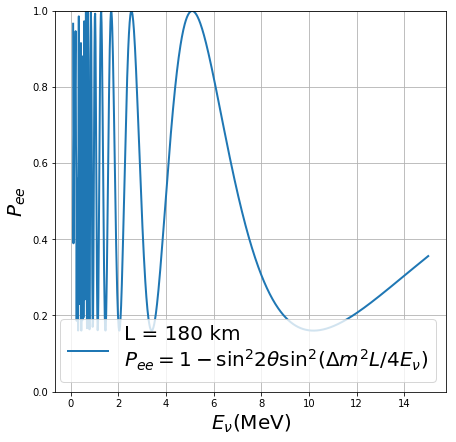

In [8]:
import astropy.units as u

L = 180 # km

delta_m_sun = 7.0e-5 # eV^2
sin_square_theta_12 = 0.84 #maximum mixing


def prob_survival(E, L):
    return 1 - sin_square_theta_12 * np.sin(1.27*delta_m_sun * L / E)**2

fig, ax = plt.subplots(figsize=(7,7))
ax.set_ylim(0,1)
ax.set_xlabel(r"$E_\nu ({\rm MeV})$",  fontsize=20)
ax.set_ylabel("$P_{ee}$", fontsize=20)

E = np.linspace(0.1, 15, 1000) #in MeV

ax.plot(E, prob_survival(E*1e-3,L), lw=2, label="L = %i km\n"%L+r"$P_{ee} = 1 -\sin^2 2\theta\sin^2(\Delta m^2L/4E_\nu)$")
plt.legend(loc="lower right",  fontsize=20)
ax.grid()
plt.show()

Eventually at low enough E / long baselines, neutrino beam becomes fully mixed and energy resolution and source extent conspire to produce 50/50 beam.

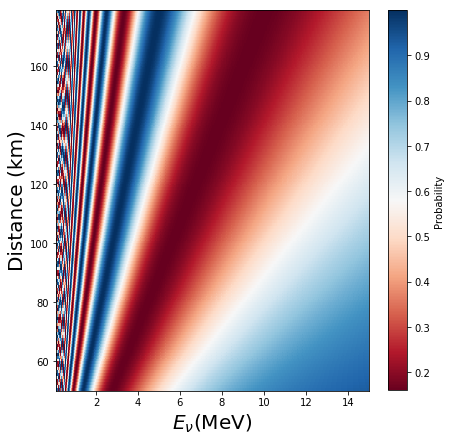

In [9]:
y, x = np.meshgrid(np.arange(50,180,1), E)
z = prob_survival(x*1e-3,y)
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
img = ax.pcolormesh(x, y, z, cmap = 'RdBu')

cax = fig.colorbar(img)
ax.set_ylabel("Distance (km)", fontsize=20)
ax.set_xlabel(r"$E_\nu ({\rm MeV})$", fontsize=20)
cax.set_label("Probability")


### General case

Taking greek letters of the flavor eingenstates and latin letter the mass eingenstates we can write:

$$|\nu_\alpha(x,t)\rangle = \sum_{k=1,2,3} U_{\alpha k} |\nu_k (x,t)\rangle = \sum_{k=1,2,3} U_{\alpha k} e^{-i\Phi_k}|\nu_k (0,0)\rangle$$

inverting the mixing matrix we have:

$$|\nu_k (0,0)\rangle =\sum_\gamma U^*_{\gamma  k} |\nu_\gamma(0,0)\rangle$$

putting it in the equation above:

$$|\nu_\alpha(x,t)\rangle =\sum_{k=1,2,3} U_{\alpha k} e^{-i\Phi_k}\sum_\gamma U^*_{\gamma  k} |\nu_\gamma(0,0)\rangle$$

If we want to evaluate the probability of finding a neutrino $\beta$ when we had $\alpha$ is the transition amplitude is given by:

$$\begin{align*}
\mathcal{A}(\nu_\alpha(0,0)\rightarrow \nu_\beta(x,t)) &= \langle \nu_\beta(x,t)|\nu_\alpha(0,0)\rangle \\
&= \sum_\gamma \sum_k U_{\gamma k}e^{i\Phi_k}U^*_{\beta k}\langle \nu_\gamma(0,0)|\nu_\alpha(0,0)\rangle \\
&= \sum_k U_{\alpha  k}e^{i\Phi_k}U^*_{\beta k}
\end{align*}$$




where we used the fact that flavor eingenstates are ortogonal and hence $\langle \nu_\gamma(0,0)|\nu_\alpha(0,0)\rangle = \delta_{\gamma,\alpha}$.

The oscillation probability is then:

$$\begin{aligned}
P(\nu_\alpha \rightarrow \nu_\beta) = |\mathcal{A}(\nu_\alpha(0,0)\rightarrow \nu_\beta(x,t))|^2 &= \left|\sum_k U_{\alpha i}e^{i\Phi_i}U^*_{\beta i}\right|^2\\
&=\sum_i U_{\alpha i}e^{i\Phi_i}U^*_{\beta i}\sum_j U^*_{\alpha j}e^{-i\Phi_j}U_{\beta j}\\
&=\sum_j\sum_i U_{\alpha i}U^*_{\beta i}U^*_{\alpha j}U_{\beta j}e^{-i(\Phi_j-\Phi_i)}
\end{aligned}$$


where $\Phi_i = E_i t- p_i x$ and so:

$$\Phi_i - \Phi_j = (E_i - E_j)t - (p_i -p_j)x$$

using $p_i = \sqrt{E^2_i -m_i^2}\sim E_i(1-\frac{m^2_i}{E_i^2})$ we can write the phase difference as:

$$\Phi_i - \Phi_j = (\frac{m_i^2}{2E_i}-\frac{m_j^2}{2E_j})L = \frac{\Delta m_{ij}^2L}{2E}$$

where we used the fact that at relativistic speeds $t = x = L$ and a dodgy approximation where we assumed that the mass eigenstates are created with the same energy or momentum and so $E_i = E_j$.This assumption is not necessary, but we find
that whatever assumption is made you get the the same result. The fact that we have to make such an approximation comes from the way that we are modelling the mass eigenstates as plane waves. If we were to do the analysis assuming that the mass states were wavepackets instead we would not need the equal momentum (equal energy) assumption and would still get the same answer.


With this we can rewrite the oscillation probability as:

$$\begin{matrix}P(\nu_\alpha \rightarrow \nu_\beta)=\delta_{\alpha\beta} & - & 4{\displaystyle \sum_{i>j}{\rm Re}(U_{\alpha i}^{*}U_{\beta i}U_{\alpha j}U_{\beta j}^{*}})\sin^{2}(\frac{\Delta m_{ij}^{2}L}{4E})\\ & + & {\displaystyle 2\sum_{i>j}{\rm Im}(U_{\alpha i}^{*}U_{\beta i}U_{\alpha j}U_{\beta j}^{*})\sin(}\frac{\Delta m_{ij}^{2}L}{2E}),\end{matrix}$$

For $\delta = 0$ the last term is 0.

### About symmetries.

* Consequences of CPT invariance:

$$P(\nu_\alpha \rightarrow \nu_\beta) = P({\bar \nu_\beta} \rightarrow {\bar \nu_\alpha})$$

* Conditions of CP invariance:

$$P(\nu_\alpha \rightarrow \nu_\beta) = P({\bar \nu_\alpha} \rightarrow {\bar \nu_\beta}) $$

* Condition os T invariance:

$$P({\nu_\alpha} \rightarrow {\nu_\beta}) = P({\nu_\beta} \rightarrow {\nu_\alpha}){\rm\; and\; }P({\bar \nu_\alpha} \rightarrow {\bar \nu_\beta}) = P({\bar \nu_\beta} \rightarrow {\bar\nu_\alpha})$$

Only if $U$ is not real we can have CP violation effects ie:

$$P(\nu_\alpha \rightarrow \nu_\beta) - P({\bar \nu_\alpha} \rightarrow {\bar \nu_\beta}) ={ 4 \sum_{i>j}{\rm Im}(U_{\alpha i}^{*}U_{\beta i}U_{\alpha j}U_{\beta j}^{*})\sin(}\frac{\Delta m_{ij}^{2}L}{2E})$$

### Mass hierarchy

But this means that neutrinos oscillations can be described in terms of 6 parameters: $\theta_{12}$, $\theta_{13}$ and $\theta_{23}$ plus 2 mass-squared differences, $\Delta m_{12}^2$ and $\Delta m_{32}^2$ and one CP violating phase $\delta_{CP}$. 
Althought we can measured the mass-squared differences in neutrino oscillation experiments, we cannot know the absolute scales nor the mass hierarchy.

<div>
<img src="https://inspirehep.net/record/1114323/files/Neutrinos_figs_3nuspic.png" width="50%" style="float:middle">
<p>Source: [arXiv:1205.2671](https://inspirehep.net/record/1114323)</p>
</div>

Where $\Delta m_{12}^2 = \Delta m_{Sol}^2$ and $\Delta m_{31(2)}^2 = \Delta m_{atm}^2$. Sometimes $\Delta m_{atm}^2$ is defined as:
 $$\Delta m_{atm}^2  =\left| m_3^2 - \frac{(m_1^2 + m_2^2)}{2} \right|$$

### Measurements Status
Assuming $\Delta m_{21}^2 \ll \Delta m_{31}^2 \sim \Delta m_{32}^2$ and small $\theta_{13}$:

<table>
 <col width="400">
 <col width="70">
<col width="400">
<tr>
<td>
$$\begin{pmatrix} 1 & 0 & 0 \\ 0 & c_{23} & s_{23} \\ 0 & -s_{23} & c_{23} \end{pmatrix}$$
</td><td>Atmospheric and Long Baseline accelerators

</td>
<td>
If $\Delta m_{21}^2L/E \ll 1$:
$$ P(\nu_\mu \rightarrow \nu_\tau) \simeq \sin^2 2\theta_{23}\sin^2\frac{\Delta m_{31}^2}{3E}L$$</td>
</tr>
<tr>
<td>

$$\begin{pmatrix} c_{13} & 0 & s_{13}e^{-i\delta}\\ 0 & 1 & 0\\ -s_{13}e^{i\delta} & 0 & c_{13}\end{pmatrix}$$
</td><td>Short Baseline reactors</td>
<td>
If $\Delta m_{21}^2L/E \ll 1$:
$$ P(\nu_e \rightarrow \nu_e) \simeq 1 - \sin^2 2\theta_{13}\sin^2\frac{\Delta m_{31}^2}{3E}L$$</td>
</tr>
<tr>
<td>
$$\begin{pmatrix} c_{12} & s_{12} & 0 \\ -s_{12} & c_{12} & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
</td><td>Solar and Long Baseline reactors</td>
<td>If $\Delta m_{31}^2L/E \gg 1$:
$$ P(\nu_e \rightarrow \nu_e) \simeq 1 - \sin^2 2\theta_{12}\sin^2\frac{\Delta m_{12}^2}{3E}L$$</td>
</tr>
</table>



### Solar Neutrinos

Neutrinos from the Sun are produced by some of the fusion reactions in the $pp$ chain or the CNO cycle. The combined effect is:

$$4p \rightarrow ^4He + 2e^+ 2\nu_e$$

From the beginning of the solar-neutrino observation a deficit of the electron neutrino predicted by the Standard Solar Model was observed: *the solar-neutrino problem*

In 1999 SNO in Canada started taking data. This experiment was able to detect $\nu_e$ by CC interactions and $\nu_x$ by NC interaction solving the mistery of the solar-neutrino problem. It is now understood as a neutrino flavor oscillation. The results of SNO together with KamLAND (a long baseline neutrino detector) confirmed the Large Mixing Angle solution (LMA) of the solar sector:

$$\sin^2 \theta_{12} \simeq 0.30$$
$$\Delta m_{12}^2 \equiv \Delta m_{\odot}^2 \simeq 8 \times 10^{-5} {\rm \; eV^2}$$


### Atmospheric Neutrinos

First evidence of atmospheric neutrino oscillations came from Super-Kamiokande experiment in 1998. By scanning in zenith angle, is like changing the $L$.

<div>
<img src="http://www.quantumdiaries.org/wp-content/uploads/2014/06/IC86Multi_NuMuOsc_results_Pscan_V1.png", width="60%" style="float:middle">
<p>Source: The IceCube collaboration</p>
</div>

If atmospheric mixing is non-maximal, it remains to determine in which “octant" the mixing angle $\theta_{23}$ lies. For a $\theta_{23}$ in the first octant (< 45$^{\circ}$) the mass eigenstate $\nu_3$ is **tau heavy**, i.e., the tau neutrino fraction is larger than the muon neutrino fraction. Conversely, for a $\theta_{23}$ in the second octant (> 45$^{\circ}$) the state $\nu_3$ is **muon heavy**.

### Reactor Neutrinos


* Double Chooz: $\sin^2 2\theta_{13} = 0.109 \pm 0.030 \pm 0.025 \neq 0$  at $2.9\sigma$
* Daya Bay: $\sin^2 2\theta_{13} = 0.089 \pm 0.010 \pm 0.005 \neq 0$ at $7.7\sigma$
* RENO: $\sin^2 2\theta_{13} = 0.113 \pm 0.013 \pm 0.019 \neq 0$ at $4.9\sigma$


### Neutrino oscillations in matter.

The $U_{PMNS}$ matrix must be modified to account for the the fact that electron neutrinos have an extra interaction not present for $\nu_\mu$ and $\nu_\tau$ when travelling through matter. Elastic scattering of $\nu_e$ on electron can occur via exchange of a charged $W$-boson as well as by exchange of the neutral $Z$-boson adding a term $V_e = G_F \sqrt{2}N_e$ in the mass differences for electrons. 

Without entering in the maths, what happens here is that a resonance effect occurs, ie, even if the mixing angle is small in vacuum it can get amplified in matter. This resonance can be expressed as a condition on the electron density $N_e$ which is appropriate for systems such as stellar interiors (Sun or supernovae too) where provided the core density is high enough, there is always a region in the neutrinos’ path exiting the star where it passes through resonance.

This is known as the **MSW effect** for the theorists who discovered it - Mikheyev, Smirnov, and Wolfenstein.


### Tutorial III: Calculate the probabilities of $\nu_e \rightarrow \nu_x$ as function of L/E

In [8]:
def PMNS_Factory(t12, t13, t23, d):
    s12 = np.sin(t12)
    c12 = np.cos(t12)
    s23 = np.sin(t23)
    c23 = np.cos(t23)
    s13 = np.sin(t13)
    c13 = np.cos(t13)
    cp  = np.exp(1j*d)
    return np.array([[ c12*c13, s12*c13, s13*np.conj(cp) ],
                  [-s12*c23 - c12*s23*s13*cp, c12*c23 - s12*s23*s13*cp, s23*c13],
                  [ s12*s23 - c12*s23*s13*cp,-c12*s23 - s12*c23*s13*cp, c23*c13]])

In [9]:
def posc(a, b, U, dm2, LEratio):
    """
    Gives the oscillation probability for nu(a) -> nu(b)
    for PMNS matrix U, and L in km and E in GeV, and dm2 in eV^2
    """
    s = 0
    for j in range(2):
        for i in range(j+1, 3):
            arg = 5.068*dm2[i+j-1]*LEratio
            mxe = np.conj(U[a,i])*U[b,i]*U[a,j]*np.conj(U[b,j])
            s += -4*mxe.real*np.sin(0.25*arg)**2 + 2*mxe.imag*np.sin(0.50*arg)
    if a == b: s += 1.0
    return s

In [10]:
t12 = np.arcsin(0.312**0.5)
t13 = np.arcsin(0.0251**0.5) #Controlls the size of the small wiggles.
#t13 = np.arcsin(0.0)
t23 = np.arcsin(0.42**0.5)

dm2 = [ 7.58E-05, 2.27E-03, 2.35E-03]
delta = 0

U = PMNS_Factory(t12, t13, t23, delta)

Let's plot some oscillograms for a $\nu_e$ beam

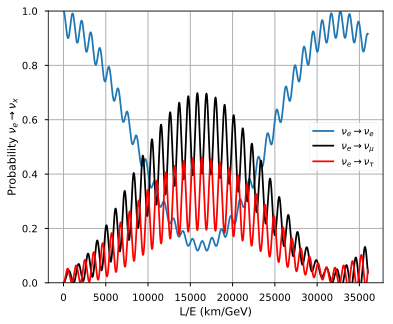

In [19]:
LE = np.linspace(0, 36000, 3600)
Pe = posc(0, 0, U, dm2, LE)
Pm = posc(0, 1, U, dm2, LE)
Pt = posc(0, 2, U, dm2, LE)
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(LE, Pe, '-', label=r'$\nu_e \rightarrow \nu_e$')
ax.plot(LE, Pm, 'k', label=r'$\nu_e\rightarrow\nu_\mu$')
ax.plot(LE, Pt, 'r', label=r'$\nu_e\rightarrow\nu_\tau$')
ax.set_xlabel("L/E (km/GeV)")
ax.set_ylabel(r"Probability $\nu_e \rightarrow \nu_x$")
ax.set_ylim(0,1)
ax.grid()
plt.legend(loc="best")
plt.show()

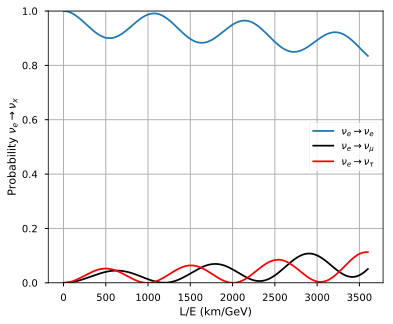

In [20]:
LE = np.linspace(0, 3600, 360)
Pe = posc(0, 0, U, dm2, LE)
Pm = posc(0, 1, U, dm2, LE)
Pt = posc(0, 2, U, dm2, LE)
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(LE, Pe, '-', label=r'$\nu_e \rightarrow \nu_e$')
ax.plot(LE, Pm, 'k', label=r'$\nu_e\rightarrow\nu_\mu$')
ax.plot(LE, Pt, 'r', label=r'$\nu_e\rightarrow\nu_\tau$')
ax.set_xlabel("L/E (km/GeV)")
ax.set_ylabel(r"Probability $\nu_e \rightarrow \nu_x$")
ax.set_ylim(0,1)
ax.grid()
plt.legend(loc="best")
plt.show()

## Cosmic Ray Experiments and Detectors
### Detection ranges

<table>
<col width="230">
<tr><th>Energy Range</th><th>Nomenclature</th><th>Detection Technique</th></tr>
<tr><td>10 MeV - 30 GeV</td><td>high (HE)</td><td>satellite/space based detector </td></tr>
<tr><td>30 GeV - 30 TeV</td><td>very high (VHE)</td><td>ground based atmospheric Cherenkov detectors </td></tr>
<tr><td>30 TeV above</td><td>ultra high (UHE) and extremely high (EHE) </td><td>ground based air-shower and fluorescence detectors.</td></tr>
</table>

### AMS



The Alpha Magnetic Spectrometer (AMS-2) is a cosmic-ray detector mounted on the [International Space Station](http://en.wikipedia.org/wiki/International_Space_Station). It is looking specifically
for positrons, antiprotons, signs of dark
matter, antimatter in universe. Its detector
systems are:

* Transition radiation detector (TRD):
transition radiation is produced when
ultra-relativistic charged particle travel
through dielectric boundary - emit
X-rays which can be used to measure
directly $\gamma$ (lorentz factor). 
* TOF - time-of-flight system
* Silicon tracking magnetic
spectrometer.
* Ring-imaging Cherenkov counter:
particle ID in GeV region.
* Electromagnetic calorimeter (ECAL).

<div>

<img src="images/Ams_experiment-de.jpg" width="50%" style="float:left">
<img src="images/mat_06_941-705_resize.jpg" width="50%" style="float:right">

</div>


### PAMELA

PAMELA is the precursor of AMS-2 but it is still operative. It is attached to an Earth orbiting satellite.It was launched in 2006 and the first to observed the  excess of high energy positrons - above what would be expected
from theoretical model of positrons produced as secondaries in CR interactions. The excess has been interpreted as many things including signal of dark matter. The source is not settled at this point.

<div>
<img src="images/pamelasmall.jpg" width="30%" style="float:middle">
</div>



### IceTop


IceTop is an array of 81 stations spanning a square kilometer of the Antarctic ice sheet. Each station is located on top of one of IceCube’s strings and holds two tanks of frozen water, each tank equipped with two IceCube sensors or DOMs. It can measure the CR spectrum from $10^{6}$ to 10$^{9}$ GeV.

<div>
<img src="images/dec-12-2010_detectordiagram.jpg" style="float:middle">
</div>

### PIERRE AUGER OBSERVATORY


The AUGER observatory is located in Malarque Argentina. It consists on 4 fluoresence detectors and 1600 water Cherenkov surface tanks deployed over area of $\sim$ 300 km$^2$. The two detector types unite techniques of AGASA (Akeno) and HiRes into single site allowing cross calibration on hybrid events, reducing greatly the systematic errors.

<div>
<img src="images/auger.png" width="40%" style="float:left">
<img src="images/auger2.png" width="40%" style="float:right">
</div>

#### The Surface Detector

Each surface detector is 10 m$^2$ plastic tank filled with water. As the charged particles pass through the water, they emit Cherenkov light which is picked up in 3 down-facing PMTs. 1 VEM (vertical equivalent muon - the standard calibration unit for surface detectors) is approx 100 p.e. in the 3 tubes.

* The distance from tank-to-tank is large - 1.5 km.
* The array is networked to a central facility using radio uplinks and each tank is solar powered.

<div>
<img src="images/Surface_detector.png" width="80%" style="float:middle">
</div>


#### The Fluorescence Detector

The four Fuorescence detectors (FD) are 2m$^2$ reflector telescopes with 400-pixel PMT camera in the focal plane.
Each camera views about 30$^{\circ} \times $ 30$^{\circ}$ patch of sky. 

<div>
<img src="images/auger_design.jpg" width="50%" style="float:left">
<img src="images/research-privitera.png" width="40%" style="float:right">
</div>


The FDs can record shower profiles versus depth and has very good energy resolution from measurement of the fluoresence output of EAS. However their duty cycle of FD is poor since obersvation must be during moonless clear nights.

## What else?

* Pressure and temperature effects in the muon and neutrino fluxes.

* Sterile neutrinos, are there more than 3 neutrinos? What does cosmology tell us, what do experiements tell us? (LSND and reactor anomalies)

* Neutrino experiments: SNO, Kamland, DayaBay etc..

Again these might be topics for your research project.


### References
* Air showers
    * A Heitler model of extensive air showers. J. Matthews [Volume 22, Issues 5–6, January 2005, Pages 387–397](http://www.sciencedirect.com/science/article/pii/S0927650504001598)
* Muons and neutrinos
    * Cosmic Rays and Particle Physics. Thomas K. Gaisser ISBN 0-521-33931-6
* Interactions with matter.
    * High Energy Astrophysics. Vol 1. Chaper 3 and 4. Malcom S. Longair ISBN 0-521-38773-6
* Observations
    * High-energy astroparticle physics. D. Semikoz. [arXiv:1010.2647v1](https://arxiv.org/abs/1010.2647)
  

In [15]:
%load_ext version_information
%version_information numpy, matplotlib, astropy, scipy

Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.49)]
IPython 5.4.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.12.0
matplotlib 2.0.0
astropy 1.3
scipy 0.18.1
Sat Mar 10 17:16:55 2018 CET